<a href="https://colab.research.google.com/github/LeToyek/ML-Kelompok5-3H-Ceria-Cepat-Cendekiawan/blob/main/Kuis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-Kelompok5-3H-Ceria-Cepat-Cendikiawan

# Penjelasan dan jawaban dapat dilihat pada file [README](https://github.com/LeToyek/ML-Kelompok5-3H-Ceria-Cepat-Cendekiawan/blob/main/README.md)

# KUIS 1

<B>KELOMPOK 5</B>

    ANNGGOTA KELOMPOK:
        1. ABDUL BASITH BAHI                       | 2141720177
        2. BAGUS REZKY ADHYAKSA                    | 2141720210
        3. MUHAMMAD DZAKA MURRAN RUSID             | 2141720076
        4. MAULANA ARIF WIJAYA                     | 2141720085
        5. SELY RULI AMANDA                        | 2141720005

# SVM

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns


## Explorasi Data

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Jumlah data setiap label:
Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


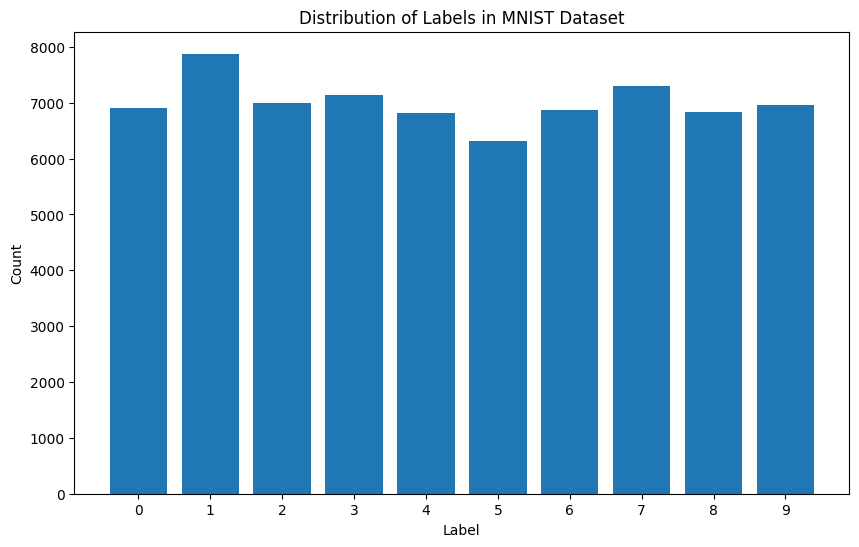

In [2]:
mnist = datasets.fetch_openml("mnist_784")
labels, counts = np.unique(mnist.target, return_counts=True)
print("Jumlah data setiap label:")
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} data")

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, tick_label=labels)

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in MNIST Dataset')

# Show the plot
plt.show()

In [3]:
import pandas as pd

# Data kelas Anda dalam bentuk dictionary
data = {
    'Label': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Jumlah Data': [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung total jumlah data
total_data = df['Jumlah Data'].sum()

# Menambahkan kolom "Persentase" yang berisi persentase distribusi
df['Persentase'] = (df['Jumlah Data'] / total_data) * 100

# Menampilkan DataFrame
print(df)

   Label  Jumlah Data  Persentase
0      0         6903    9.861429
1      1         7877   11.252857
2      2         6990    9.985714
3      3         7141   10.201429
4      4         6824    9.748571
5      5         6313    9.018571
6      6         6876    9.822857
7      7         7293   10.418571
8      8         6825    9.750000
9      9         6958    9.940000


In [4]:
# Jumlah data setiap label
data_counts = [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]

# Hitung deviasi standar
std_deviation = np.std(data_counts)

# Hitung ambang batas
batas = (0.05 * sum(data_counts))

# Menentukan apakah data seimbang atau tidak
if std_deviation < batas:  # Ini hanya contoh ambang batas yang dapat disesuaikan
    print("Data dianggap seimbang.")
else:
    print("Data dianggap tidak seimbang.")


Data dianggap seimbang.


## Sample Data

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


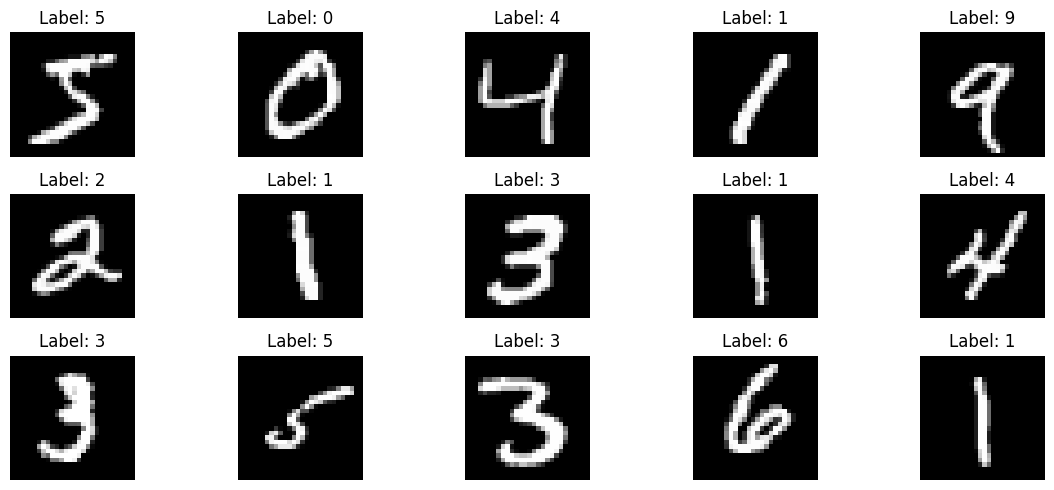

In [7]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Scalling Dataset

In [8]:
scalling = MinMaxScaler()
X_scalling = scalling.fit_transform(X)

In [9]:
print(X_scalling[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Split Dataset

In [10]:
#Xtrain, Xtest, ytrain, ytest = train_test_split(X_scalling, y, test_size=0.3, random_state=42) #70:30
#Xtrain, Xtest, ytrain, ytest = train_test_split(X_scalling, y, test_size=0.2, random_state=42) #80:20
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scalling, y, test_size=0.1, random_state=42) #90:10

## Menerapkan PCA untuk Reduksi Dimensi Data

In [11]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

## Mencari hyperparameter yang terbaik untuk menghasilkan kinerja model yang optimal

In [12]:
param_grid = {'svc__C': [1],
              'svc__gamma': [0.001]}
grid_search = GridSearchCV(model, param_grid, cv=5) #mengombinasikan parameter dalam param_grid untuk model yg telah dibuat "model"
%time grid_search.fit(Xtrain, ytrain) #melatih model menggunakan GridSearchCV untuk melakukan kombinasi semua parameter dalam param_grid dgn menggunakan data pelatihan 'X_train' dan data label 'y_train'

CPU times: user 23min 29s, sys: 17.2 s, total: 23min 46s
Wall time: 23min 43s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1], 'svc__gamma': [0.001]})

In [13]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'svc__C': 1, 'svc__gamma': 0.001}
0.9479841269841269


In [14]:
model = grid_search.best_estimator_ #mengambil model terbaik dari hasil penelusuran hiperparameter
yfit = model.predict(Xtest) #membuat prediksi pada data uji 'X_test'

## Evaluasi Model

In [15]:
target_names = [str(i) for i in range(10)]
print(classification_report(ytest, yfit, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       683
           1       0.97      0.98      0.97       800
           2       0.93      0.95      0.94       674
           3       0.93      0.93      0.93       760
           4       0.92      0.95      0.93       611
           5       0.94      0.93      0.93       658
           6       0.97      0.97      0.97       677
           7       0.96      0.94      0.95       724
           8       0.95      0.94      0.95       693
           9       0.95      0.93      0.94       720

    accuracy                           0.95      7000
   macro avg       0.95      0.95      0.95      7000
weighted avg       0.95      0.95      0.95      7000



Text(277.72222222222223, 0.5, 'predicted label')

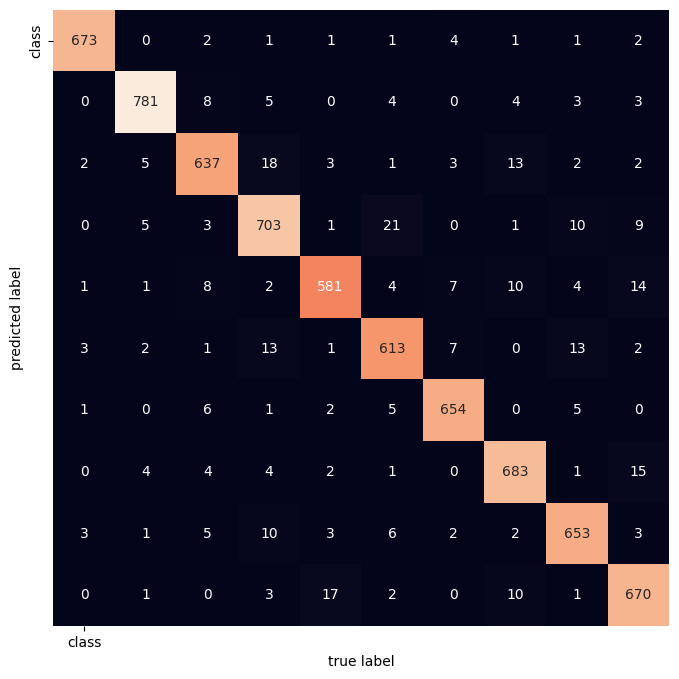

In [16]:
# bentuk confusion matrix
mat = confusion_matrix(ytest, yfit)

plt.figure(figsize=(12, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Pelabelan Citra Data Testing

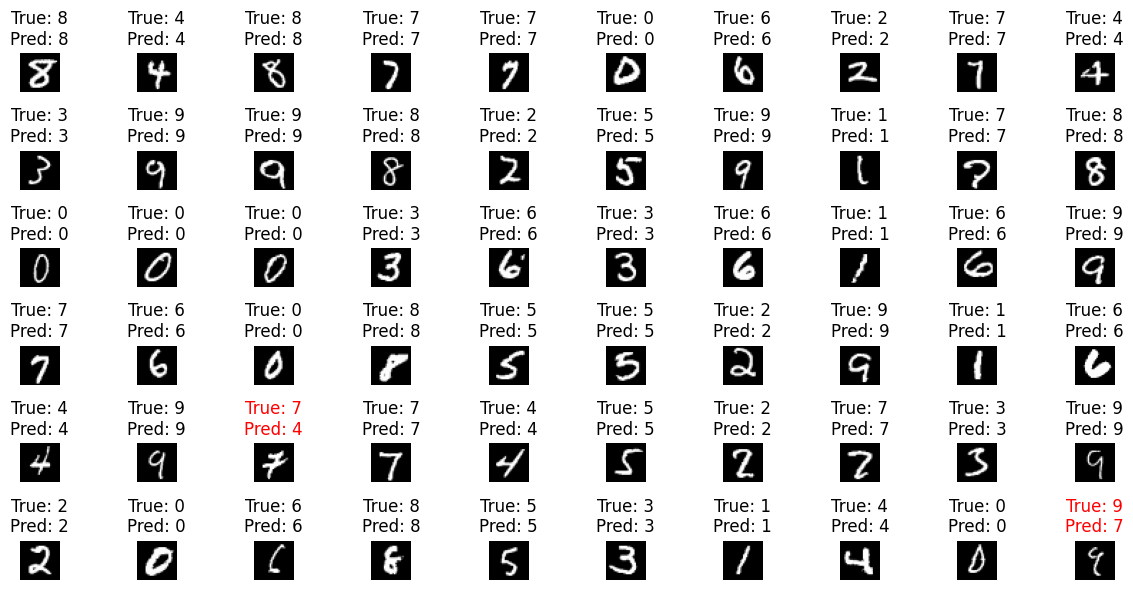

In [17]:
n_samples_to_display = 60
# Display images with true labels and predicted labels
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 10, i + 1)
    plt.imshow(Xtest[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = ytest.iloc[i] if isinstance(ytest, pd.Series) else ytest[i]
    pred_label = yfit.iloc[i] if isinstance(yfit, pd.Series) else yfit[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

# GausianNB

## Import Library

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns

## Explorasi Data

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Jumlah data setiap label:
Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


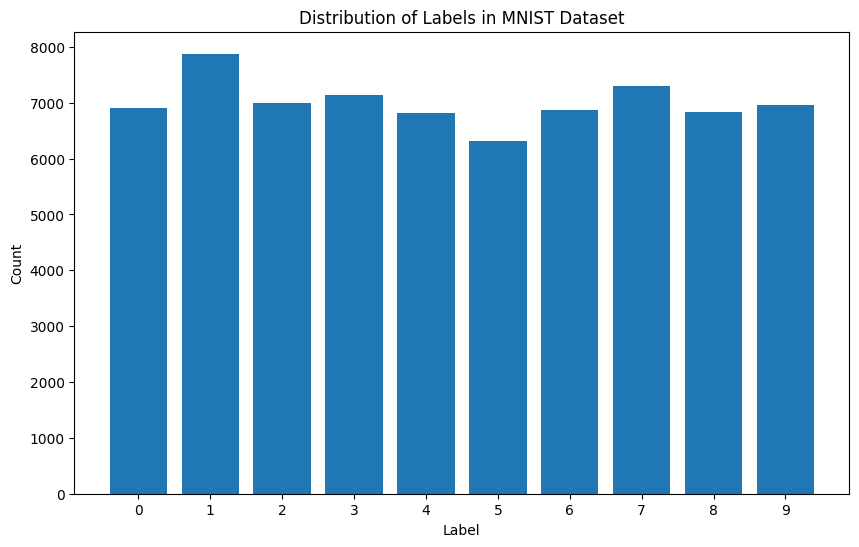

In [19]:
mnist = datasets.fetch_openml("mnist_784")
labels, counts = np.unique(mnist.target, return_counts=True)
print("Jumlah data setiap label:")
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} data")

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, tick_label=labels)

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in MNIST Dataset')

# Show the plot
plt.show()

In [20]:
import pandas as pd

# Data kelas Anda dalam bentuk dictionary
data = {
    'Label': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Jumlah Data': [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung total jumlah data
total_data = df['Jumlah Data'].sum()

# Menambahkan kolom "Persentase" yang berisi persentase distribusi
df['Persentase'] = (df['Jumlah Data'] / total_data) * 100

# Menampilkan DataFrame
print(df)

   Label  Jumlah Data  Persentase
0      0         6903    9.861429
1      1         7877   11.252857
2      2         6990    9.985714
3      3         7141   10.201429
4      4         6824    9.748571
5      5         6313    9.018571
6      6         6876    9.822857
7      7         7293   10.418571
8      8         6825    9.750000
9      9         6958    9.940000


In [21]:
# Jumlah data setiap label
data_counts = [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]

# Hitung deviasi standar
std_deviation = np.std(data_counts)

# Hitung ambang batas
batas = (0.05 * sum(data_counts))

# Menentukan apakah data seimbang atau tidak
if std_deviation < batas:  # Ini hanya contoh ambang batas yang dapat disesuaikan
    print("Data dianggap seimbang.")
else:
    print("Data dianggap tidak seimbang.")


Data dianggap seimbang.


## Sample Data

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


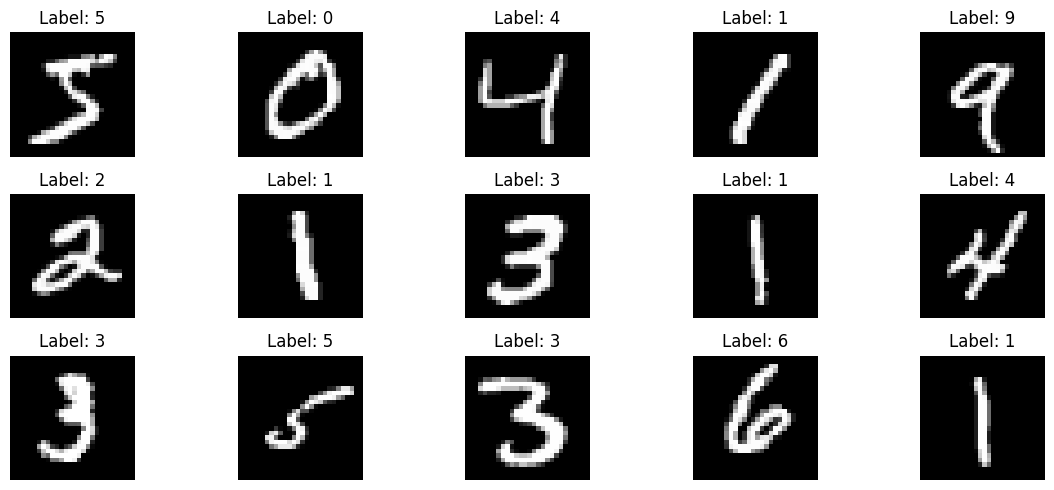

In [22]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Scalling Dataset

In [23]:
scalling = MinMaxScaler()
X_scalling = scalling.fit_transform(X)

In [24]:
print(X_scalling[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Split Dataset

In [25]:
#Xtrain, Xtest, ytrain, ytest = train_test_split(X_scalling, y, test_size=0.3, random_state=42) #70:30
#Xtrain, Xtest, ytrain, ytest = train_test_split(X_scalling, y, test_size=0.2, random_state=42) #80:20
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scalling, y, test_size=0.1, random_state=42) #90:10

## Menerapkan PCA untuk Reduksi Dimensi Data

In [26]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
nb = GaussianNB()
model = make_pipeline(pca, nb)
model.fit(Xtrain, ytrain)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('gaussiannb', GaussianNB())])

## Evaluasi Model

In [28]:
y_pred = model.predict(Xtest)

In [29]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       683
           1       0.98      0.93      0.96       800
           2       0.66      0.86      0.74       674
           3       0.82      0.82      0.82       760
           4       0.87      0.79      0.83       611
           5       0.77      0.80      0.79       658
           6       0.94      0.90      0.92       677
           7       0.93      0.83      0.88       724
           8       0.87      0.85      0.86       693
           9       0.82      0.83      0.82       720

    accuracy                           0.85      7000
   macro avg       0.86      0.85      0.85      7000
weighted avg       0.86      0.85      0.86      7000



Text(113.9222222222222, 0.5, 'predicted label')

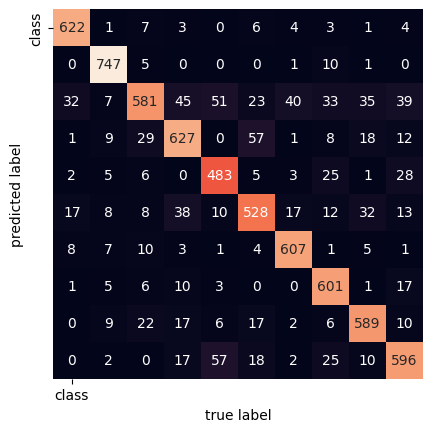

In [30]:
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Pelabelan Citra Data Testing

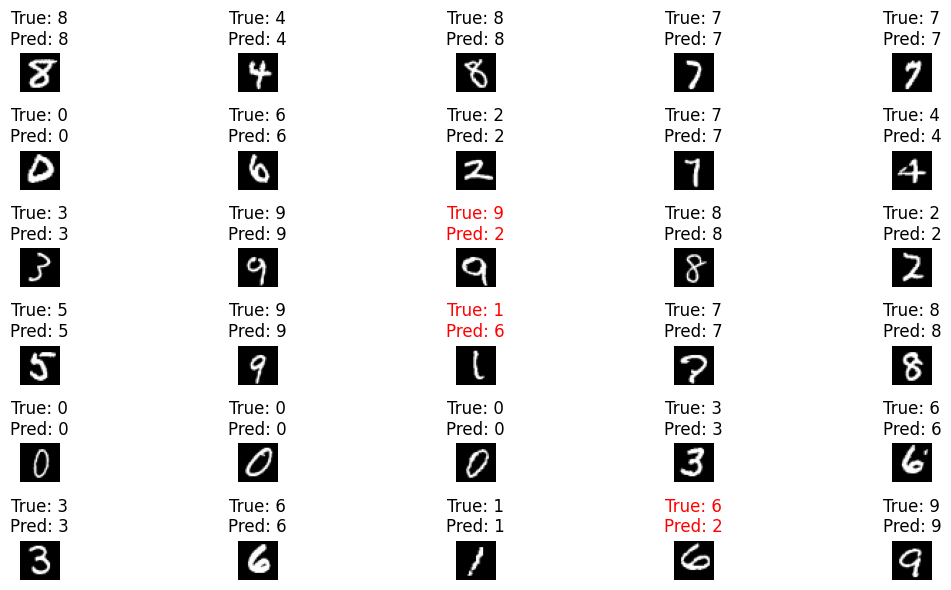

In [31]:
n = 30

plt.figure(figsize=(12, 6))
for i in range(n):
    plt.subplot(6, 5, i + 1)
    plt.imshow(Xtest[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = ytest.iloc[i] if isinstance(ytest, pd.Series) else ytest[i]
    pred_label = y_pred.iloc[i] if isinstance(y_pred, pd.Series) else y_pred[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

# MultinominalNB

## Import Library

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns

## Explorasi Data

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Jumlah data setiap label:
Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


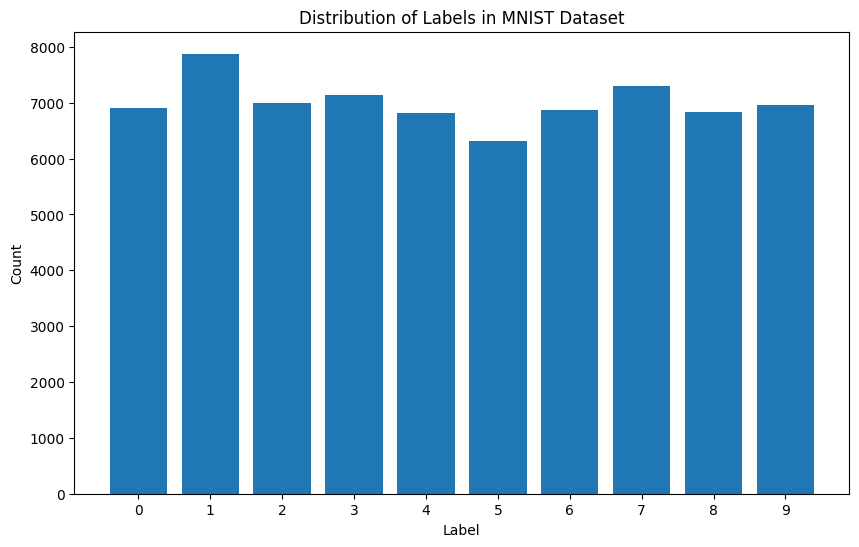

In [33]:
mnist = datasets.fetch_openml("mnist_784")
labels, counts = np.unique(mnist.target, return_counts=True)
print("Jumlah data setiap label:")
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} data")

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, tick_label=labels)

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in MNIST Dataset')

# Show the plot
plt.show()

In [34]:
import pandas as pd

# Data kelas Anda dalam bentuk dictionary
data = {
    'Label': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Jumlah Data': [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung total jumlah data
total_data = df['Jumlah Data'].sum()

# Menambahkan kolom "Persentase" yang berisi persentase distribusi
df['Persentase'] = (df['Jumlah Data'] / total_data) * 100

# Menampilkan DataFrame
print(df)

   Label  Jumlah Data  Persentase
0      0         6903    9.861429
1      1         7877   11.252857
2      2         6990    9.985714
3      3         7141   10.201429
4      4         6824    9.748571
5      5         6313    9.018571
6      6         6876    9.822857
7      7         7293   10.418571
8      8         6825    9.750000
9      9         6958    9.940000


In [35]:
# Jumlah data setiap label
data_counts = [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]

# Hitung deviasi standar
std_deviation = np.std(data_counts)

# Hitung ambang batas
batas = (0.05 * sum(data_counts))

# Menentukan apakah data seimbang atau tidak
if std_deviation < batas:  # Ini hanya contoh ambang batas yang dapat disesuaikan
    print("Data dianggap seimbang.")
else:
    print("Data dianggap tidak seimbang.")


Data dianggap seimbang.


## Sample Data

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


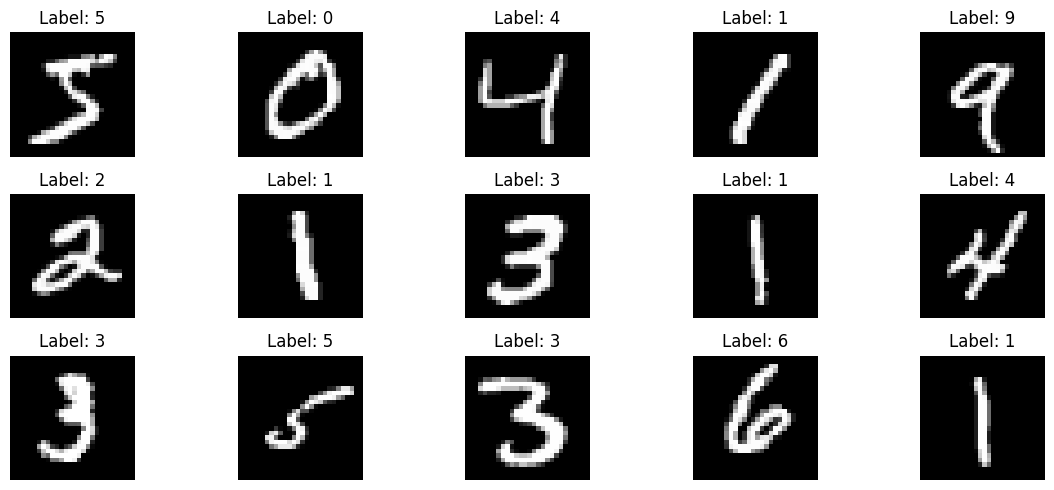

In [36]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Scalling Dataset

In [37]:
scalling = MinMaxScaler()
X_scalling = scalling.fit_transform(X)

In [38]:
print(X_scalling[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Split Dataset

In [39]:
#Xtrain, Xtest, ytrain, ytest = train_test_split(X_scalling, y, test_size=0.3, random_state=42) #70:30
#Xtrain, Xtest, ytrain, ytest = train_test_split(X_scalling, y, test_size=0.2, random_state=42) #80:20
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scalling, y, test_size=0.1, random_state=42) #90:10

## Menerapkan PCA untuk Reduksi Dimensi Data

In [46]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
model = make_pipeline(pca)

In [47]:
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)

MultinomialNB()

## Evaluasi Model

In [49]:
y_pred = mnb.predict(Xtest)

In [43]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       683
           1       0.98      0.93      0.96       800
           2       0.66      0.86      0.74       674
           3       0.82      0.82      0.82       760
           4       0.87      0.79      0.83       611
           5       0.77      0.80      0.79       658
           6       0.94      0.90      0.92       677
           7       0.93      0.83      0.88       724
           8       0.87      0.85      0.86       693
           9       0.82      0.83      0.82       720

    accuracy                           0.85      7000
   macro avg       0.86      0.85      0.85      7000
weighted avg       0.86      0.85      0.86      7000



Text(113.9222222222222, 0.5, 'predicted label')

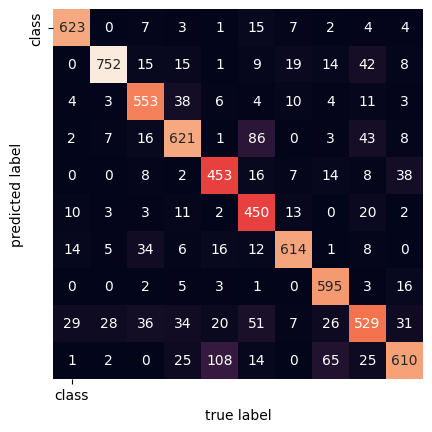

In [50]:
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Pelabelan Citra Data Testing

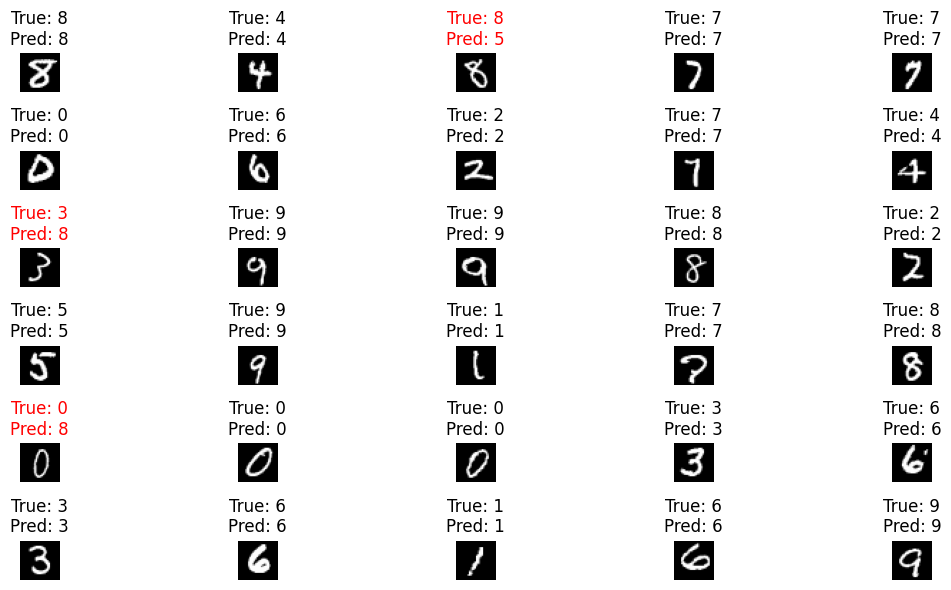

In [51]:
n = 30

plt.figure(figsize=(12, 6))
for i in range(n):
    plt.subplot(6, 5, i + 1)
    plt.imshow(Xtest[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = ytest.iloc[i] if isinstance(ytest, pd.Series) else ytest[i]
    pred_label = y_pred.iloc[i] if isinstance(y_pred, pd.Series) else y_pred[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()